## MSDM5056 -- K means and Hierarchical Clustering

In this example, we use k_means for clustering. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import k_means

### K means clustering:

In [2]:
# Initiate the random number generator

np.random.seed()

In [3]:
# Create 50 points normally distributed on the plane with mean 0 and std 1

x = np.array(np.random.normal(size=100)).reshape(-1, 2)

In [4]:
# Shift half of the points 4 units right and 3 units down below

x[1:25, 0] = x[1:25, 0] + 4
x[1:25, 1] = x[1:25, 1] - 3

In [5]:
# Fit the model with 2 clusters

km_out_2 = k_means(x, n_clusters = 2, n_init = 20)

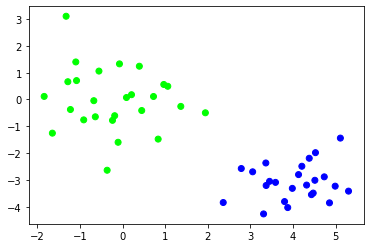

In [6]:
# Draw the graph

plt.scatter(x[:, 0], x[:, 1], c=km_out_2[1], cmap='brg')
plt.show()

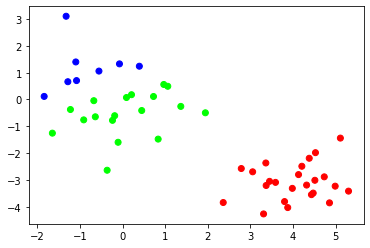

In [7]:
# np.random.seed(1)
km_out_3 = k_means(x, n_clusters = 3, n_init = 20)
plt.scatter(x[:,0], x[:,1], c=km_out_3[1], cmap='brg')
plt.show()

In [8]:
# Use K means clustering method on S&P 500 stocks (data from 2015)
df_kmeans = pd.read_csv('sp500_kmeans.csv')

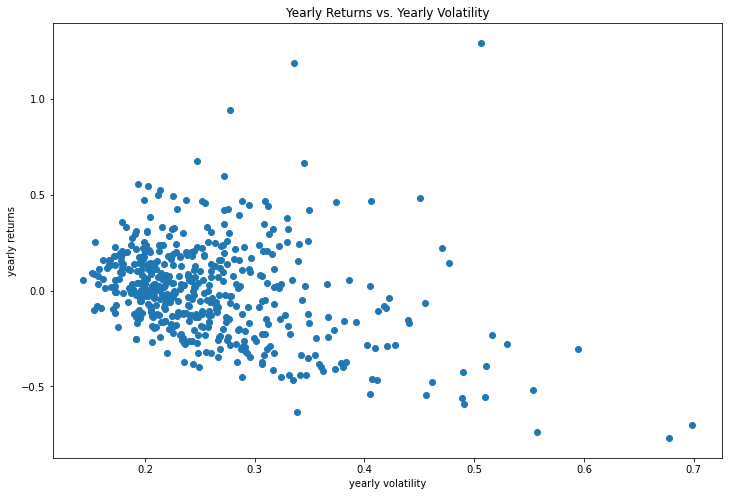

In [9]:
# Plot the data 
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.scatter(df_kmeans['yearly_vol'], df_kmeans['yearly_returns'])
plt.title('Yearly Returns vs. Yearly Volatility')
plt.ylabel('yearly returns')
plt.xlabel('yearly volatility')
plt.show()

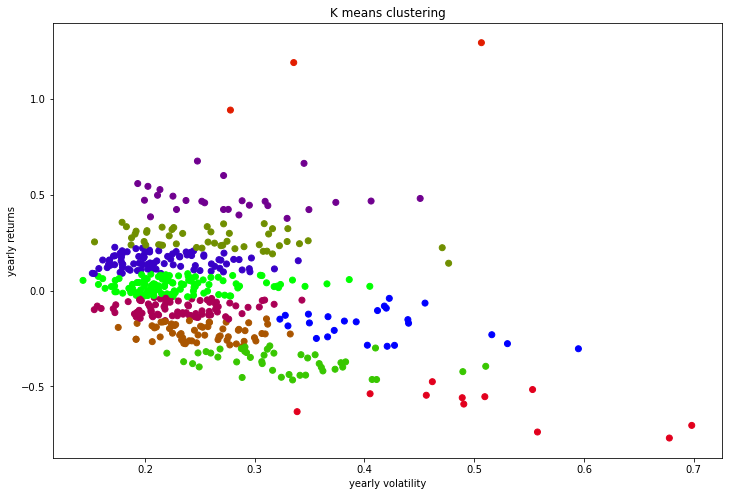

In [10]:
# Now use K means clustering method to find the clusters and plot the data again
data_kmeans = np.asarray([np.asarray(df_kmeans['yearly_vol']),np.asarray(df_kmeans['yearly_returns'])]).T
km_clusters = k_means(data_kmeans, n_clusters = 10, n_init = 20)
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
plt.scatter(data_kmeans[:,0], data_kmeans[:,1], c = km_clusters[1], cmap='brg')
plt.title('K means clustering')
plt.ylabel('yearly returns')
plt.xlabel('yearly volatility')
plt.show()

### Hierarchical clustering:

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
# Create 50 points normally distributed on the plane with mean 0 and std 1

x = np.array(np.random.normal(size=100)).reshape(-1, 2)

In [13]:
# Shift half of the points 2 units right and 3 units down below

x[1:25, 0] = x[1:25, 0] + 2
x[1:25, 1] = x[1:25, 1] - 3

In [14]:
# Set models

hc_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
hc_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
hc_average = AgglomerativeClustering(n_clusters=2, linkage='average')
hc_single = AgglomerativeClustering(n_clusters=2, linkage='single')

In [15]:
# Fit models

hc_ward_pred = hc_ward.fit_predict(x)
hc_complete_pred = hc_complete.fit_predict(x)
hc_average_pred = hc_average.fit_predict(x)
hc_single_pred = hc_single.fit_predict(x)

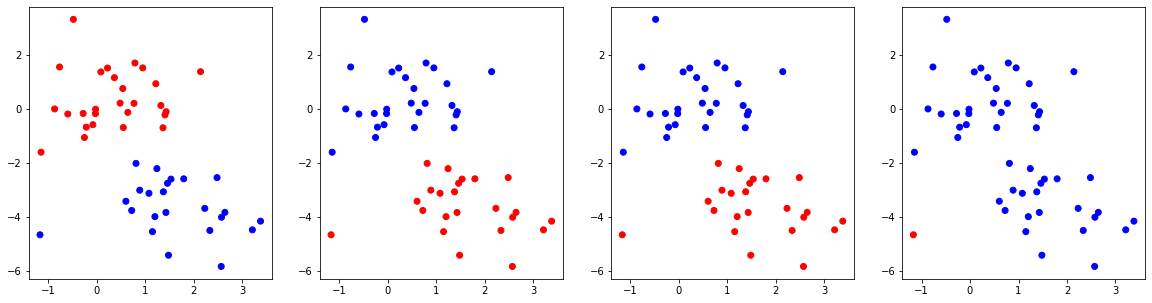

In [16]:
# Draw graphs

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].scatter(x[:, 0], x[:, 1], c=hc_ward_pred, cmap='bwr')
ax[1].scatter(x[:, 0], x[:, 1], c=hc_complete_pred, cmap='bwr')
ax[2].scatter(x[:, 0], x[:, 1], c=hc_average_pred, cmap='bwr')
ax[3].scatter(x[:, 0], x[:, 1], c=hc_single_pred, cmap='bwr')
plt.show()

In [17]:
# Again set models for the preset number of clusters 

hc_ward = AgglomerativeClustering(n_clusters=10, linkage='ward')
hc_complete = AgglomerativeClustering(n_clusters=10, linkage='complete')
hc_average = AgglomerativeClustering(n_clusters=10, linkage='average')
hc_single = AgglomerativeClustering(n_clusters=10, linkage='single')

In [18]:
# Fit models with the S&P 500 data

hc_ward_pred = hc_ward.fit_predict(data_kmeans)
hc_complete_pred = hc_complete.fit_predict(data_kmeans)
hc_average_pred = hc_average.fit_predict(data_kmeans)
hc_single_pred = hc_single.fit_predict(data_kmeans)

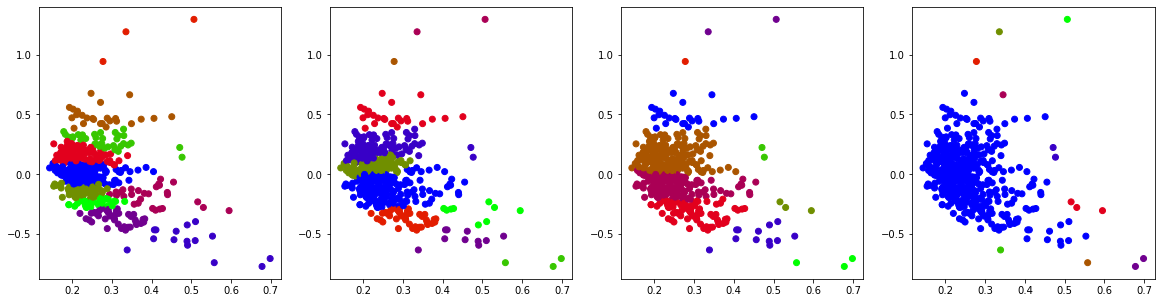

In [19]:
# Draw graphs

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].scatter(data_kmeans[:,0], data_kmeans[:,1], c=hc_ward_pred, cmap='brg')
ax[1].scatter(data_kmeans[:,0], data_kmeans[:,1], c=hc_complete_pred, cmap='brg')
ax[2].scatter(data_kmeans[:,0], data_kmeans[:,1], c=hc_average_pred, cmap='brg')
ax[3].scatter(data_kmeans[:,0], data_kmeans[:,1], c=hc_single_pred, cmap='brg')
plt.show()